In [41]:
# credit: https://www.kaggle.com/code/clamytoe/kitchenware-dataset-generator
import os
from collections import defaultdict
from hashlib import md5
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import PIL

In [25]:
!pwd

/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project


In [26]:
# base structure
project_dir = Path('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project')
img_dir = project_dir / 'images'

# new structure
dataset_dir = Path('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images_by_class')
train_dir = dataset_dir / 'train'
test_dir = dataset_dir / 'test'

# dataset files
train_data = project_dir / 'train.csv'
test_data = project_dir / 'test.csv'

In [27]:
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

train_df['filename'] = train_df['Id'].apply(lambda x: f"{x:04d}.jpg")
test_df['filename'] = test_df['Id'].apply(lambda x: f"{x:04d}.jpg")

In [28]:
hash_dict = defaultdict(list)
for image in img_dir.glob('*.jpg'):
    with image.open('rb') as f:
        img_hash = md5(f.read()).hexdigest()
        hash_dict[img_hash].append(image)
len(hash_dict)

9361

In [29]:
duplicate_img = []
for k, v in hash_dict.items():
    if len(v) > 1:
        if v[0].name != v[1].name:
            duplicate_img.append(v[0])
            duplicate_img.append(v[1])
            print(v)
len(duplicate_img)

[PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images/4162.jpg'), PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images/3458.jpg')]
[PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images/7103.jpg'), PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images/5428.jpg')]
[PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images/7196.jpg'), PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images/7063.jpg')]
[PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images/0237.jpg'), PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images/4234.jpg')]
[PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images/6833.jpg'), PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images/8532.jpg')]
[PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/images/7469.jpg'), PosixPath('/home/jovyan/ml_zoomcamp_cohort_2022/capstone_project/image

12

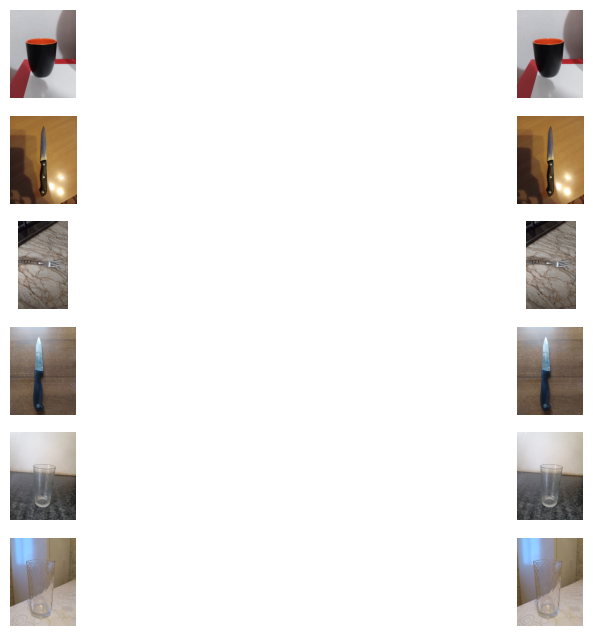

In [30]:
plt.figure(figsize=(12,8))

for idx, img in enumerate(duplicate_img):
    im = PIL.Image.open(img)
    plt.subplot(6,2, idx+1)
    plt.imshow(im)
    plt.axis('off')
plt.show()

In [31]:
images = list(img_dir.glob('*.jpg'))
print(f'Found: {len(images)} images')

Found: 9367 images


In [44]:
count = 0
for img in train_df.filename.to_list():
    label = train_df[train_df.filename == img].label.values[0]
    img_path = img_dir / img
    new_dir = train_dir.absolute() / label
    new_path = train_dir.absolute() / label / img
    if not new_path.exists():
        try:
            if not os.path.exists(new_dir):
                os.makedirs(new_dir)
            new_path.write_bytes(img_path.read_bytes())
            count += 1
        except FileNotFoundError:
            pass
print(f'Total moved: {count}')

Total moved: 5558
